<a href="https://colab.research.google.com/github/sjung-stat/Customer-Support-Chat-Intent-Classification/blob/main/Data%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Import dataset from GitHub 

In [4]:
url_training = 'https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/train.csv'
url_testing = 'https://raw.githubusercontent.com/PolyAI-LDN/task-specific-datasets/master/banking_data/test.csv'
df_training = pd.read_csv(url_training)
df_testing = pd.read_csv(url_testing)

### Data investigation

In [5]:
df_training.head(10)

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival
5,When did you send me my new card?,card_arrival
6,Do you have info about the card on delivery?,card_arrival
7,What do I do if I still have not received my n...,card_arrival
8,Does the package with my card have tracking?,card_arrival
9,I ordered my card but it still isn't here,card_arrival


In [6]:
df_training.describe()

print("The training set consists of {} examples with {} different categories".format(df_training.shape[0], len(pd.unique(df_training['category']))))

The training set consists of 10003 examples with 77 different categories


In [7]:
# Investigate how many training examples are contained in each category.

intent_examples_count = df_training.groupby(['category'])['category'].count().reset_index(name='count').sort_values(['count'], ascending=False)
with pd.option_context('display.max_rows', None):
  print(intent_examples_count)

                                            category  count
16                          card_payment_fee_charged    187
29               direct_debit_payment_not_recognised    182
7   balance_not_updated_after_cheque_or_cash_deposit    181
75                     wrong_amount_of_cash_received    180
20                            cash_withdrawal_charge    177
63                         transaction_charged_twice    175
27                          declined_cash_withdrawal    173
64                              transfer_fee_charged    172
66                transfer_not_received_by_recipient    171
6            balance_not_updated_after_bank_transfer    171
52                                    request_refund    169
17                       card_payment_not_recognised    168
18                  card_payment_wrong_exchange_rate    167
35                         extra_charge_on_statement    166
76           wrong_exchange_rate_for_cash_withdrawal    163
0                              Refund_no

> We can observe that some intents are underrepresented in the data (i.e. class imbalancement). For example, intents such as 'contactless_not_working' and 'virtual_card_not_working' have only about 35-40 examples, whereas 'card_not_working' has approximately 3 times more data. 

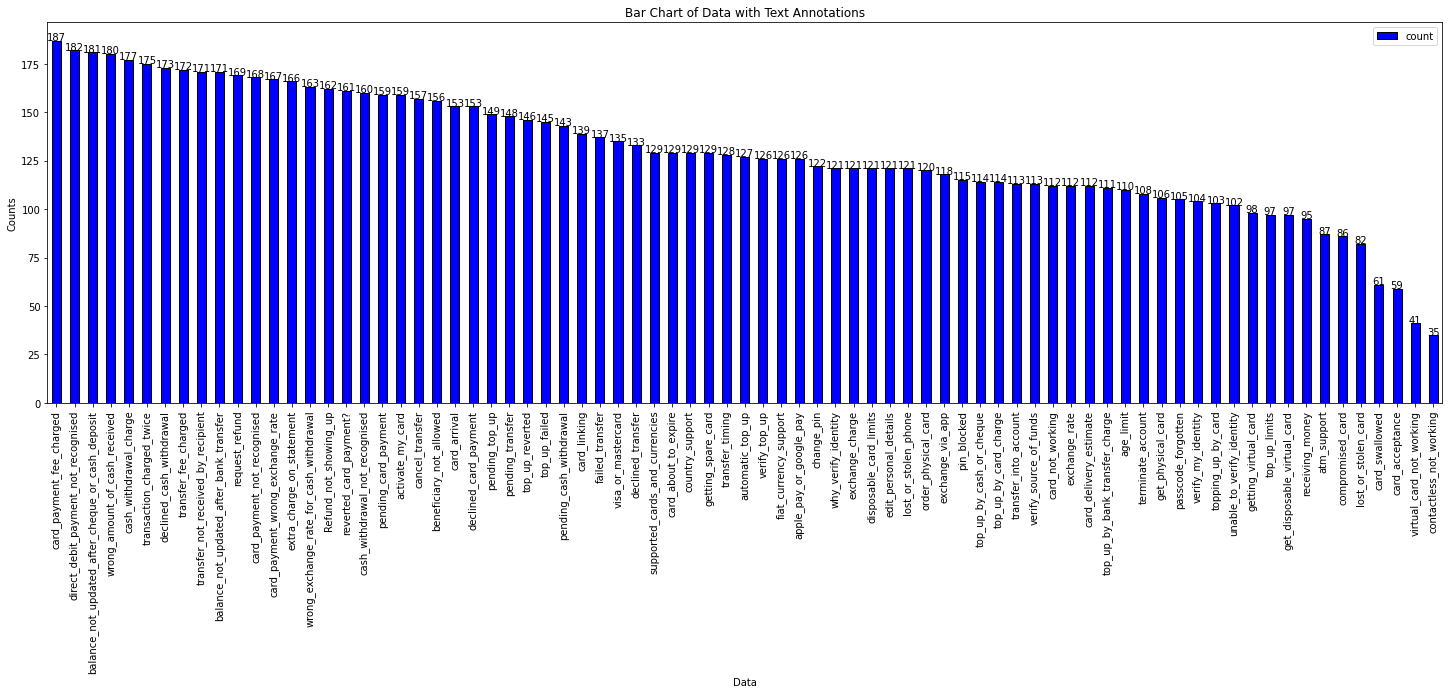

In [20]:
# plot a bar chart
ax = intent_examples_count.plot.bar(x='category', y='count', color='blue', edgecolor='black')

# add text annotations to the bar chart
for i in range(len(intent_examples_count)):
    ax.text(i, intent_examples_count.iloc[i]['count'] + 0.2, str(intent_examples_count.iloc[i]['count']), ha='center')

# add a title and labels to the x and y axis
plt.title("Bar Chart of Data with Text Annotations")
plt.xlabel("Data")
plt.ylabel("Counts")
plt.gcf().set_size_inches(25, 7)

# show the plot
plt.show()

In [ ]:
# Explore the text data: Use techniques such as word clouds or frequency plots to visualize the most common words used in the text data. 
# This can give you insights into which words are more indicative of certain intents, and which words may need to be removed as stop words.

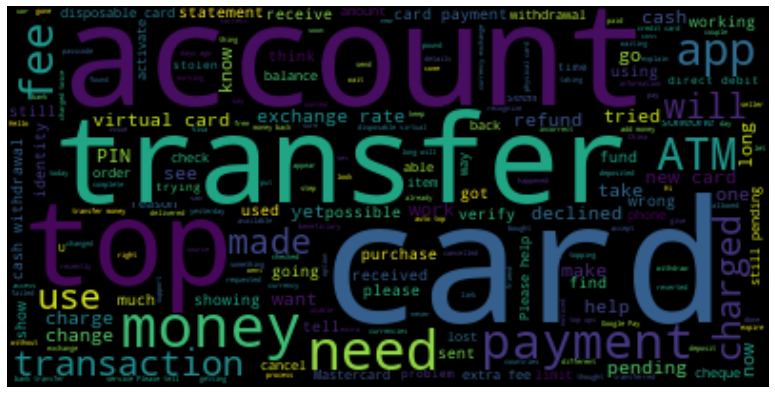

In [22]:
from wordcloud import WordCloud

# create a string of words
text_training = " ".join(word for word in df_training['text'])

# generate a word cloud
wordcloud = WordCloud().generate(text_training)

# plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.gcf().set_size_inches(15, 7)
plt.show()

In [27]:
# count the number of words in each sentence
df_training['word_count'] = df_training['text'].apply(lambda x: len(x.split()))

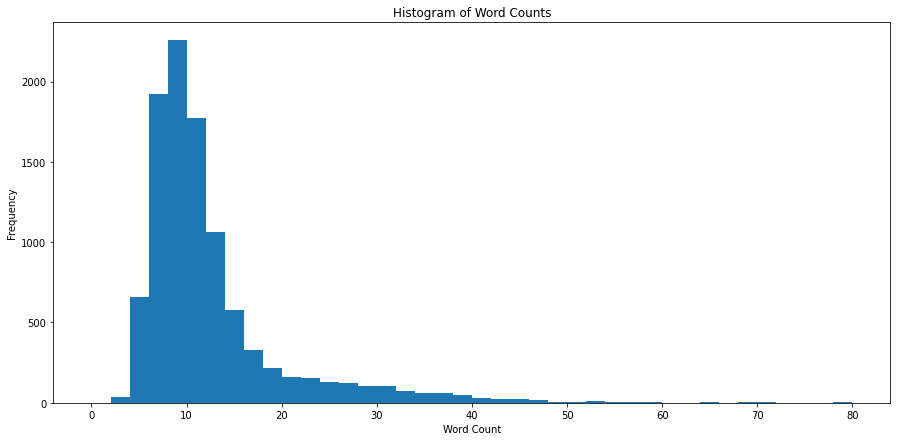

In [31]:
# plot a histogram of the word counts
plt.hist(df_training['word_count'], bins=range(0, max(df_training['word_count']) + 2, 2))

# add a title and labels to the x and y axis
plt.title("Histogram of Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# show the plot
plt.gcf().set_size_inches(15, 7)
plt.show()

In [33]:
# Observe the texts of which the number of words is greater than 40.

df_training[df_training['word_count'] > 40].head(20)

,text,category,word_count
751,When I used one of the ATMs in the city centre...,pending_cash_withdrawal,64
753,Hello. I looked at my account and see that a t...,pending_cash_withdrawal,53
762,I tried to get cash at some ATM in the city ce...,pending_cash_withdrawal,42
768,I tried to access money earlier but the machin...,pending_cash_withdrawal,45
771,"Hi there, earlier today I tried to take money ...",pending_cash_withdrawal,62
800,Hello. I have a transaction in my account list...,pending_cash_withdrawal,47
806,Looking at my account I've noticed a charge th...,pending_cash_withdrawal,60
809,"Hi, I tried to withdraw some money from an ATM...",pending_cash_withdrawal,47
847,I tried to take out some money from an ATM ear...,pending_cash_withdrawal,45
865,"Hello, I tried to take some cash out of the AT...",pending_cash_withdrawal,41


In [35]:
df_training.word_count.min() # This seems weird

2

In [37]:
df_training[df_training['word_count'] < 5] # Turns out that they are not weird

,text,category,word_count
62,My card hasn't arrived.,card_arrival,4
87,Where is my card?,card_arrival,4
152,My card never arrived.,card_arrival,4
317,How's the exchange rate?,exchange_rate,4
601,$1 charge in transaction.,extra_charge_on_statement,4
...,...,...,...
9891,Who gets support?,country_support,3
9904,Which countries are supported,country_support,4
9920,Can I get support?,country_support,4
9979,Supported countries,country_support,2


An example of using Exploratory Data Analysis (EDA) for intent classification in machine learning is as follows:

Imagine you have a dataset of customer support inquiries, and you want to build a model to classify the intent of each inquiry. During EDA, you would perform the following steps:

- Visualize the distribution of intents: Plot a bar chart to see the count of each intent in the dataset. This will help you understand the class imbalance, i.e. whether some intents are underrepresented in the data.

- Explore the text data: Use techniques such as word clouds or frequency plots to visualize the most common words used in the text data. This can give you insights into which words are more indicative of certain intents, and which words may need to be removed as stop words.

- Analyze text length: Plot a histogram to see the distribution of text lengths in the dataset. This can help identify any outliers or instances where the text is too short or too long to be useful for intent classification.

- Check for missing values: Check for missing values in the dataset, as these can impact the performance of the machine learning model.

By performing these steps of EDA, you can get a better understanding of the nature of the data, and make informed decisions about how to preprocess and transform the data before feeding it into a machine learning model for intent classification.

In [8]:
# card_arrival vs. card_delivery_estimate ==> look similar ==> compare the text data of each category

df_training[df_training['category']=='card_arrival']

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival
...,...,...
148,I haven't gotten my credit card in the mail.,card_arrival
149,My card hasn't arrived yet. What do I do?,card_arrival
150,"My card still hasn't arrived after two weeks, ...",card_arrival
151,My card appears to have never arrived?,card_arrival


In [9]:
df_training[df_training['category']=='card_delivery_estimate']

,text,category
1006,Can it specifically be delivered on a certain ...,card_delivery_estimate
1007,I need to get my card quickly,card_delivery_estimate
1008,When can I expect my card? I live in the US.,card_delivery_estimate
1009,Help! When will the card arrive at my home?,card_delivery_estimate
1010,Can I get my card fast tracked?,card_delivery_estimate
...,...,...
1113,what is the leadtime for a new card to show up...,card_delivery_estimate
1114,What's the earliest time to receive my card?,card_delivery_estimate
1115,are you sending me my card?,card_delivery_estimate
1116,I need my card immediately.,card_delivery_estimate


In [10]:
df_training.isnull().sum()

text        0
category    0
dtype: int64

In [11]:
!pip install transformers



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 39.1 MB/s eta 0:00:00


In [12]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Artificial Intelligence [MASK] take over the world.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.31824034452438354,
  'token': 2064,
  'token_str': 'can',
  'sequence': 'artificial intelligence can take over the world.'},
 {'score': 0.1829964816570282,
  'token': 2097,
  'token_str': 'will',
  'sequence': 'artificial intelligence will take over the world.'},
 {'score': 0.05600164458155632,
  'token': 2000,
  'token_str': 'to',
  'sequence': 'artificial intelligence to take over the world.'},
 {'score': 0.04519513249397278,
  'token': 2015,
  'token_str': '##s',
  'sequence': 'artificial intelligences take over the world.'},
 {'score': 0.04515312612056732,
  'token': 2052,
  'token_str': 'would',
  'sequence': 'artificial intelligence would take over the world.'}]

In [2]:
# Required to preprocess text for BERT inputs
!pip install -q tensorflow-text==2.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.3/464.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 49.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.9/462.9 KB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 KB 5.5 MB/s eta 0:00:00
ERROR: Operation cancelled by user


## Tast 1: 
See if some of the categories can be merged together to have enough data for each category.

## Task 2:
Consider dropping some of the minor categories to reduce complexity of the data

## Task 3:
Do some research on "zero shot intent classification"


Notes:

- Frameworks:
  - Address the difference between ***TensorFlow*** and ***PyTorch*** frameworks and justify the reason why I would choose one over the other
    - I would use TensorFlow because of its 모델 배포 (TensorFlow Serving)
- Transformers:
  - GPT-3, BERT, etc.
  - which one should I use for intent recognition?
- How to incorporate zero-shot approach
:




Example repositories:
- Intent Classification with BERT
  - [https://hannibunny.github.io/mlbook/transformer/intent_classification_with_bert.html]
